<a href="https://colab.research.google.com/github/nupur1262/Geeksman_AISquad_Project2_NUPUR1/blob/master/Final%20Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##UPLOADING .json FILE

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

##DOWNLOADING DATASET FROM KAGGLE

In [3]:
!kaggle datasets download -d nupurpahuja09/face-detection

 79% 89.0M/113M [00:04<00:01, 14.4MB/s]
100% 113M/113M [00:04<00:00, 24.2MB/s] 


In [4]:
!unzip "*.zip"

Archive:  face-detection.zip
  inflating: train_data/dataset-metadata.txt  
  inflating: train_data/me/IMG-20190717-WA0022.jpg  
  inflating: train_data/me/IMG-20190827-WA0058.jpg  
  inflating: train_data/me/IMG-20190916-WA0115.jpg  
  inflating: train_data/me/IMG-20190916-WA0148.jpg  
  inflating: train_data/me/IMG-20190916-WA0164.jpg  
  inflating: train_data/me/IMG-20190916-WA0193.jpg  
  inflating: train_data/me/IMG-20191029-WA0021.jpg  
  inflating: train_data/me/IMG-20191029-WA0022.jpg  
  inflating: train_data/me/IMG-20200101-WA0014.jpg  
  inflating: train_data/me/IMG-20200101-WA0019.jpg  
  inflating: train_data/me/IMG-20200101-WA0021.jpg  
  inflating: train_data/me/IMG-20200101-WA0034.jpg  
  inflating: train_data/me/IMG-20200217-WA0009.jpg  
  inflating: train_data/me/IMG-20200220-WA0030.jpg  
  inflating: train_data/me/IMG-20200227-WA0023.jpeg  
  inflating: train_data/me/IMG-20200227-WA0025.jpeg  
  inflating: train_data/me/IMG-20200227-WA0032.jpeg  
  inflating: train_d

In [5]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-28 13:06:11--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-08-28 13:06:12 (7.08 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [6]:
import dlib
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [28]:
img1 = face_finder('/content/train_data/me/IMG-20200101-WA0019.jpg')
len(img1)

1

In [23]:
len(img1)

1

In [7]:
import cv2
import os
l = os.listdir('/content/train_data/me')
for i in l:
  if(i.endswith(".png") or i.endswith('.jpg') or i.endswith('.png')):
    try:
      img1 = face_finder(f'/content/train_data/me/{i}')
      img1[0].save(i)
    except:
      continue  

In [8]:
os.makedirs("/content/training/me")

In [9]:
import shutil
m = os.listdir('/content/')
for i in m:
  if(i.endswith(".png") or i.endswith('.jpg') or i.endswith('.png')):
    shutil.move(f'/content/{i}' , '/content/training/me' )

In [35]:
len(os.listdir('/content/training/me'))

87

In [10]:
shutil.move('/content/train_data/not_me' , '/content/training')

'/content/training/not_me'

##CREATING DATA THAT CAN BE TRAINED

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [12]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(Path("training"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['me', 'not_me']

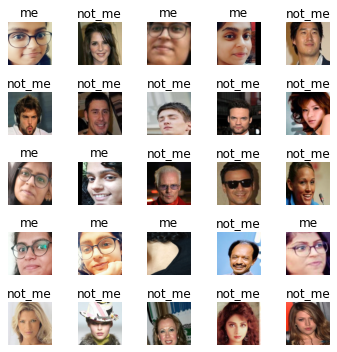

In [14]:
data.show_batch(rows=5, figsize=(5,5))

##CREATING A MODEL

In [15]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [17]:
alexnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.123953,0.592901,0.128205,00:07
1,0.091823,0.422392,0.128205,00:06
2,0.068229,0.354126,0.102564,00:06
3,0.060361,0.337872,0.102564,00:06


In [19]:
alexnet_learn.save('stage-1')

In [20]:
interp = ClassificationInterpretation.from_learner(alexnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

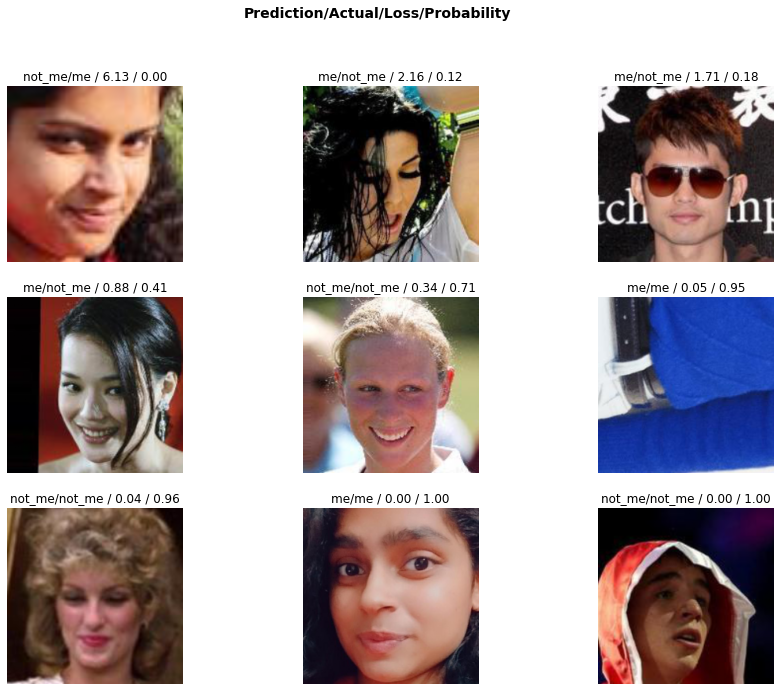

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

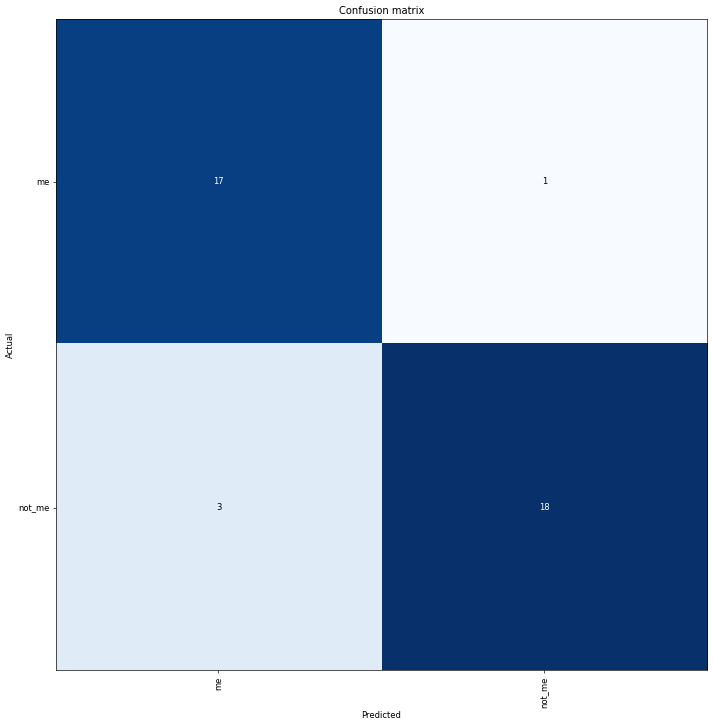

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
alexnet_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


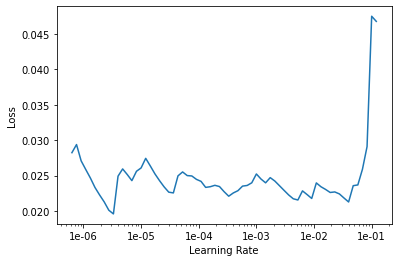

In [24]:
alexnet_learn.recorder.plot()

In [25]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
os.makedirs("/content/drive/My Drive/face-detection-final/",exist_ok=True)

In [31]:
my_dir="/content/drive/My Drive/face-detection-final"

In [32]:
alexnet_learn.save(my_dir+"/Stage-1")

In [33]:
alexnet_learn.load("/content/drive/My Drive/face-detection-final/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (159 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
me,me,me,me,me
Path: training;

Valid: LabelList (39 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_me,not_me,not_me,not_me,not_me
Path: training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
    

In [34]:
alexnet_learn.export(my_dir+"/export.pkl")

In [35]:
os.makedirs("/content/export_values",exist_ok=True)
my_path = "/content/export_values"
alexnet_learn.save(my_path+"/Stage-1")
alexnet_learn.export(my_path+"/export.pkl")

##UPLOADING MODEL ON KORA DRIVE

In [36]:
!pip install -U kora

In [37]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/export.pkl')
url2

'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl'

In [38]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/Stage-1.pth')
url2

'https://drive.google.com/uc?id=1DPDQkw72TyDJX-CyCvvKsbzBXKMrGiNG'